### Exploratory Data Analysis
- pull database with relevant players stats and transfer market value
- data attribution: https://www.kaggle.com/datasets/khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset


In [162]:
import pandas as pd

df = pd.read_csv('final_data.csv')

df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


### Clean the Data
- capture relevant features and metadata
- make 'league' feature to specify premier league teams

In [163]:
df = df.drop(columns=['player'])

# Explicit list of Premier League teams present in the CSV
premier_league_teams = [
    'Manchester United',
    'Manchester City',
    'Liverpool',
    'Chelsea',
    'Arsenal',
    'Tottenham Hotspur',
    'Leicester City',
    'Everton',
    'West Ham United',
    'Southampton',
    'Wolverhampton Wanderers',
    'Newcastle United',
    'Crystal Palace',
    'Aston Villa',
    'Brighton & Hove Albion',
    'Burnley',
    'Watford',
    'Norwich City',
    'Leeds United'
    # Add or remove teams as needed based on your CSV
 ]

df['league'] = ['Premier League' if team in premier_league_teams else 'Other League' for team in df['team']]
df.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,league
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,...,0.335463,9390,42,5,13,15000000,70000000,1,0,Premier League
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,...,0.207055,1304,510,58,1,1500000,22000000,1,0,Premier League
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.924658,292,697,84,4,600000,6000000,1,0,Premier League
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,...,0.000000,6408,175,22,9,50000000,50000000,2,0,Premier League
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,...,0.000000,5031,238,51,21,40000000,80000000,2,0,Premier League


### Feature Selection
- choose relevant features to expose to our model
- stats like goals, assists, etc. differ in importance to players in different positions -> one-hot encode the positions
- for now, we will stick to premier league players

In [164]:
features = []

for ft in df.columns.tolist():
    if(ft not in ['name', 'team', 'winger', 'position']):
        features.append(ft)

df = df.loc[:, features]
df = df.loc[df['league'] == 'Premier League', :]
df = df.drop(columns=['league', 'highest_value'])
df.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,position_encoded
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,1
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,1
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,1
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,2
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,2


In [165]:
#one-hot encoding
positions_ohe = pd.get_dummies(df, columns=['position_encoded'])
df = positions_ohe
df = df.rename(
    {'position_encoded_1':'goalkeeper',
     'position_encoded_2':'defender',
     'position_encoded_3':'midfielder',
     'position_encoded_4':'attacker'}, axis=1
    )

df.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,goalkeeper,defender,midfielder,attacker
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,True,False,False,False
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,True,False,False,False
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,True,False,False,False
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,False,True,False,False
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,False,True,False,False


### Model Selection
- Given transfer market value is quantified continuously, a **regression** model seems ideal
- There are a variety of positions which determine the importance which certain stats may weigh on performances and value, thus indicating a **tree-based regressor** be ideal

In [181]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

X = df.drop(columns=["current_value"])
y = df["current_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(
    # n_estimators=100,     
    # min_samples_split=5,  
    random_state=42,
    n_jobs=-1             
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:,.0f}")
print(f"MAE: {mae:,.0f}")


RMSE: 17,571,631
MAE: 9,966,114


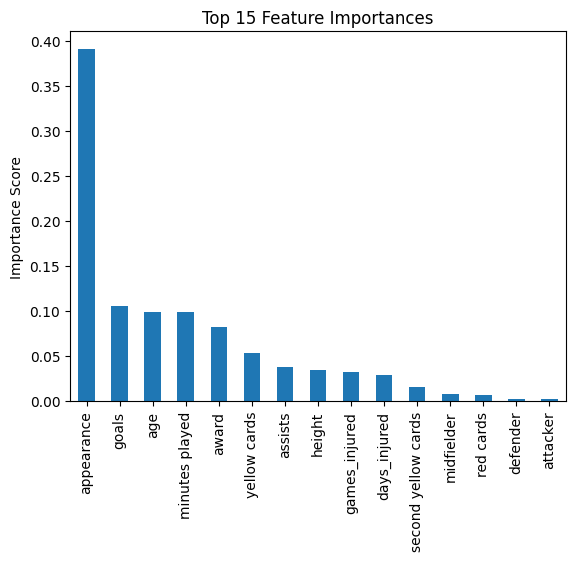

In [ ]:
importances = rf.feature_importances_
feature_names = X_train.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

feat_imp.head(15).plot(kind="bar")
plt.title("Top 15 Feature Importances")
plt.ylabel("Importance Score")
plt.show()